In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import numpy as np
import time
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from metaperceptron import Data
import warnings
warnings.filterwarnings('ignore')


from numpy.random import normal, rand, choice, uniform
from numpy import mean, pi, sin, cos, array,zeros
from math import gamma
import numpy
from copy import deepcopy
import random as rande
import math
from numpy import where
import time
import csv


In [2]:
from WMFO import WMFO

# Define the objective function to minimize
def mlp_objective_function(params):
    # Reshape the flattened parameters to the original shapes of weights and biases
    shapes = [w.shape for w in mlp.model.coefs_ + mlp.model.intercepts_]
    params = numpy.split(params, numpy.cumsum([numpy.prod(shape) for shape in shapes]))

    # Set the parameters in the MLP model
    for i in range(len(mlp.model.coefs_)):
        mlp.model.coefs_[i] = params[i].reshape(shapes[i])
    for i in range(len(mlp.model.intercepts_)):
        mlp.model.intercepts_[i] = params[len(mlp.model.coefs_) + i].reshape(shapes[len(mlp.model.coefs_) + i])

    # Train the model and return the mean squared error as the objective to minimize
    mlp.fit(data.X_train, data.y_train.ravel())
    y_pred = mlp.predict(data.X_test)
    mse = mean_squared_error(data.y_test, y_pred)

    return mse


In [3]:

# Define the objective function to minimize
def mlp_objective_function(params):
    # Reshape the flattened parameters to the original shapes of weights and biases
    shapes = [w.shape for w in mlp.model.coefs_ + mlp.model.intercepts_]
    params = numpy.split(params, numpy.cumsum([numpy.prod(shape) for shape in shapes]))

    # Set the parameters in the MLP model
    for i in range(len(mlp.model.coefs_)):
        mlp.model.coefs_[i] = params[i].reshape(shapes[i])
    for i in range(len(mlp.model.intercepts_)):
        mlp.model.intercepts_[i] = params[len(mlp.model.coefs_) + i].reshape(shapes[len(mlp.model.coefs_) + i])

    # Train the model and return the mean squared error as the objective to minimize
    mlp.fit(data.X_train, data.y_train.ravel())
    y_pred = mlp.predict(data.X_test)
    mse = mean_squared_error(data.y_test, y_pred)

    return mse

class MLPRegression(object):
    def __init__(self, inputSize, outputSize, hiddenLayerSizes):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenLayerSizes = hiddenLayerSizes
        self.model = MLPRegressor(activation='relu', hidden_layer_sizes=hiddenLayerSizes, batch_size=32,) #solver='adam', max_iter=300,
        

    def predict(self, X):
        return self.model.predict(X)

    def fit(self, X, y):
        self.model.fit(X, y)

    def get_weights_and_biases(self):
        # Accessing the weights and biases for each layer
        weights = self.model.coefs_
        biases = self.model.intercepts_
        return weights, biases

    def establish_model(self, params):
        shapes = [w.shape for w in self.model.coefs_ + self.model.intercepts_]
        params = numpy.split(params, numpy.cumsum([numpy.prod(shape) for shape in shapes]))

        # Set the parameters in the MLP model
        for i in range(len(self.model.coefs_)):
            self.model.coefs_[i] = params[i].reshape(shapes[i])
        for i in range(len(self.model.intercepts_)):
            self.model.intercepts_[i] = params[len(self.model.coefs_) + i].reshape(shapes[len(self.model.coefs_) + i])




In [4]:
# Example usage:
inputSize = 5
outputSize = 1
hiddenLayerSizes = (30, 15, 5)

# Load and preprocess data
df=pd.read_csv('Finland.csv')

output=['CO2']
features=['FR', 'GASF', 'GDP', 'OIF', 'REC', 'PR',] #
 
X=df[features].values
y=df[output].values

data = Data(X, y)
## Split train and test
data.split_train_test(test_size=0.2, random_state=2, inplace=True)
print(data.X_train.shape, data.X_test.shape)

## Scaling dataset
data.X_train, scaler_X = data.scale(data.X_train, scaling_methods=("standard", "minmax"))
data.X_test = scaler_X.transform(data.X_test)

data.y_train, scaler_y = data.scale(data.y_train, scaling_methods=("standard", "minmax"))
data.y_test = scaler_y.transform(data.y_test)

print(type(data.X_train), type(data.y_train))


mlp = MLPRegression(inputSize, outputSize, hiddenLayerSizes)

# Assuming you have training data X_train, y_train
mlp.fit(data.X_train, data.y_train)

# Get weights and biases
weights, biases = mlp.get_weights_and_biases()

initial_params = numpy.concatenate([w.flatten() for w in weights + biases])
shapes = [w.shape for w in weights + biases]


# Set the lower and upper bounds for each parameter
# Define the search space bounds for SCA
lb = -1.0
ub = 1.0
PopSize = 20
iters = 50
problem_size=len(initial_params)

# Perform SCA optimization to find the optimal weights and biases
wmfo_solution = WMFO(mlp_objective_function, lb, ub, problem_size, PopSize, iters)

result = wmfo_solution

#mlp.establish_model(sca_solution.bestIndividual)


Flag = False
def storedata(p):
    import csv
    global Flag
    ExportToFile = "WMFO.csv"
    CnvgHeader = []
    with open(ExportToFile, "a", newline="\n") as out:
        writer = csv.writer(out, delimiter=",")
        if (Flag == False):  # just one time to write the header of the CSV file
            header = np.concatenate([["Optimizer", "objfname", "ExecutionTime", "best"], CnvgHeader])
            writer.writerow(header)
            Flag = True
        a = np.concatenate([[p.optimizer, p.objfname, p.executionTime, p.best], p.convergence])
        writer.writerow(a)
        out.close()

storedata(result)

y_pred_train = mlp.predict(data.X_train)
y_pred = mlp.predict(data.X_test)

train_prediction = y_pred_train
test_prediction = y_pred
y_train_gen = data.y_train
y_test_gen = data.y_test




(102, 6) (26, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
1.864812e-03


In [5]:
from permetrics import RegressionMetric
evaluator_train = RegressionMetric(y_train_gen, train_prediction, decimal=6)
evaluator_test = RegressionMetric(y_test_gen, test_prediction, decimal=6)

name = "MLP-WMFO"
name_model = ['Mode', 'NNSE_Train', 'NNSE_Test', 'R2_Train', 'R2_Test', 'MSE_Train', 'MSE_Test', 'MSLE_Train', 'MSLE_Test', 'MAE_Train', 'MAE_Test']
print(*name_model, sep='\t')
model_result = [name,
                evaluator_train.NNSE(),
               evaluator_test.NNSE(),
               evaluator_train.R2(),
               evaluator_test.R2(),
               evaluator_train.MSE(),
               evaluator_test.MSE(),
               evaluator_train.MSLE(),
               evaluator_test.MSLE(),
               evaluator_train.MAE(),
               evaluator_test.MAE(),]
print(*model_result, sep='\t')


Mode	NNSE_Train	NNSE_Test	R2_Train	R2_Test	MSE_Train	MSE_Test	MSLE_Train	MSLE_Test	MAE_Train	MAE_Test
MLP-WMFO	0.983429	0.973289	0.98315	0.972556	0.001085	0.001865	0.00043	0.00072	0.02486	0.034572


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


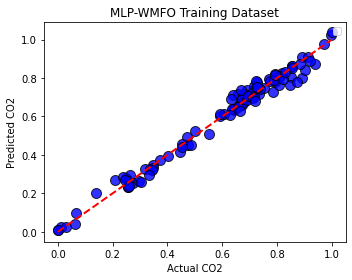

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


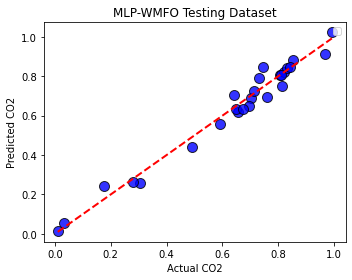

In [6]:
#---------------------------------------------------

# Plot and save actual vs. predicted values for testing data
plt.figure(figsize=(5, 4))
plt.scatter(data.y_train, np.asarray(y_pred_train).flatten(), c='blue', s=100, alpha = 0.8, edgecolor='black', linewidth=1)
#plt.style.use('seaborn')
plt.plot([min(data.y_train), max(data.y_train)], [min(data.y_train), max(data.y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title(f'{name} Training Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(False)
plt.savefig(f'{name} Training.png')
plt.show()


#----------------------------------------------


# Plot and save actual vs. predicted values for testing data
plt.figure(figsize=(5, 4))
plt.scatter(data.y_test, np.asarray(y_pred).flatten(), c='blue', s=100, alpha = 0.8, edgecolor='black', linewidth=1)
#plt.style.use('seaborn')
plt.plot([min(data.y_test), max(data.y_test)], [min(data.y_test), max(data.y_test)], color='red', linestyle='--', linewidth=2 )
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title(f'{name} Testing Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(False)
plt.savefig(f'{name} Testing.png')
plt.show()


#-----------------------------------------------------